# Attendance Prediction for GoodLife

## Group3

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

### Load the data

In [60]:
df = pd.read_csv('problem2.csv')
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [61]:
print(df.isnull().sum())

booking_id           0
months_as_member     0
weight              20
days_before          0
day_of_week          0
time                 0
category             0
attended             0
dtype: int64


In [62]:
df = df.dropna()

In [63]:
print(df.isnull().sum())

booking_id          0
months_as_member    0
weight              0
days_before         0
day_of_week         0
time                0
category            0
attended            0
dtype: int64


### Data preprocessing

In [64]:
# Remove 'days' text from 'days_before' and convert to numeric
df['days_before'] = df['days_before'].str.extract(r'\s*(\d+)').astype(int)

C:\Users\dut08\AppData\Local\Temp\ipykernel_46744\1430647853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_before'] = df['days_before'].str.extract(r'\s*(\d+)').astype(int)


In [65]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [66]:
# Standardize the 'day_of_week' column
df.loc[:, 'day_of_week'] = df['day_of_week'].str[:3].str.upper()

In [67]:
df = df.drop(columns=['booking_id'])
df = df.reset_index(drop=True)

### Encode categorical variables

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   months_as_member  1480 non-null   int64  
 1   weight            1480 non-null   float64
 2   days_before       1480 non-null   int32  
 3   day_of_week       1480 non-null   object 
 4   time              1480 non-null   object 
 5   category          1480 non-null   object 
 6   attended          1480 non-null   int64  
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 75.3+ KB


In [69]:
label_encoder = LabelEncoder()
df['day_of_week'] = label_encoder.fit_transform(df['day_of_week'])
df['time'] = label_encoder.fit_transform(df['time'])
df['category'] = label_encoder.fit_transform(df['category'])

In [70]:
df

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,17,79.56,8,6,1,4,0
1,10,79.01,2,1,0,3,0
2,16,74.53,14,3,0,4,0
3,5,86.12,10,0,0,2,0
4,15,69.29,8,4,0,3,0
...,...,...,...,...,...,...,...
1475,21,79.51,10,0,0,3,0
1476,29,89.55,2,1,0,4,0
1477,9,87.38,4,5,0,3,0
1478,34,68.64,14,3,0,1,0


### Exploratory Data Analysis

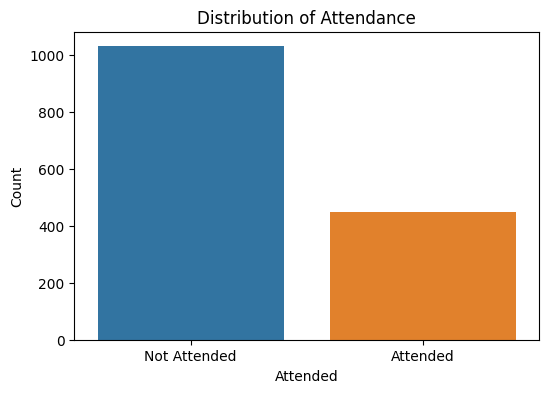

In [71]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='attended')
plt.title('Distribution of Attendance')
plt.xlabel('Attended')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Attended', 'Attended'])
plt.show()

Attendance Imbalance: The bar chart shows a significant imbalance between the number of members who attended the class and those who did not. The "Not Attended" group has a substantially higher count compared to the "Attended" group.

c:\Users\dut08\Documents\conestoga\sem1\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dut08\Documents\conestoga\sem1\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\dut08\Documents\conestoga\sem1\foundation\CSCN8010\venv\CSCN8010_classic_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


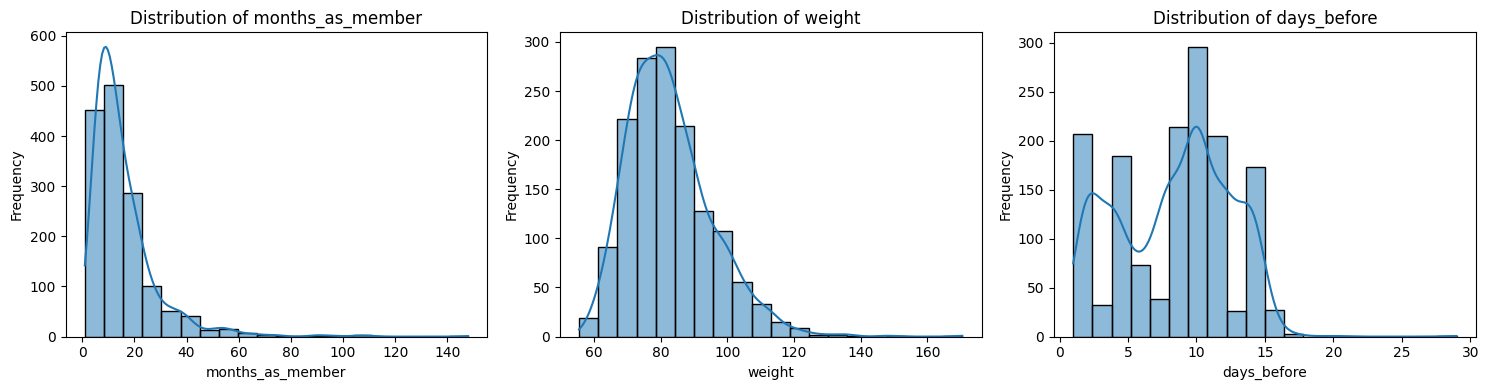

In [72]:
numerical_features = ['months_as_member', 'weight', 'days_before']
plt.figure(figsize=(15, 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

- Member Retention:
Since most members have been with the club for less than 20 months, strategies to retain members beyond this period could be beneficial. For example, introducing loyalty programs or long-term membership benefits could help.
- Weight Diversity:
The club appears to attract members across a broad range of weights, with a concentration around the average weight. This diversity suggests that the fitness programs offered are appealing to a wide audience, which is a positive sign.
- Booking Patterns:
The multimodal nature of the days_before booking pattern indicates different booking behaviors. Understanding these behaviors can help optimize marketing and reminder strategies. For example, sending reminders around the typical booking peaks (1, 7, and 10 days before the class) could improve attendance rates.
Additionally, identifying why certain members book very close to the class date could help in understanding and possibly addressing last-minute cancellations or no-shows.

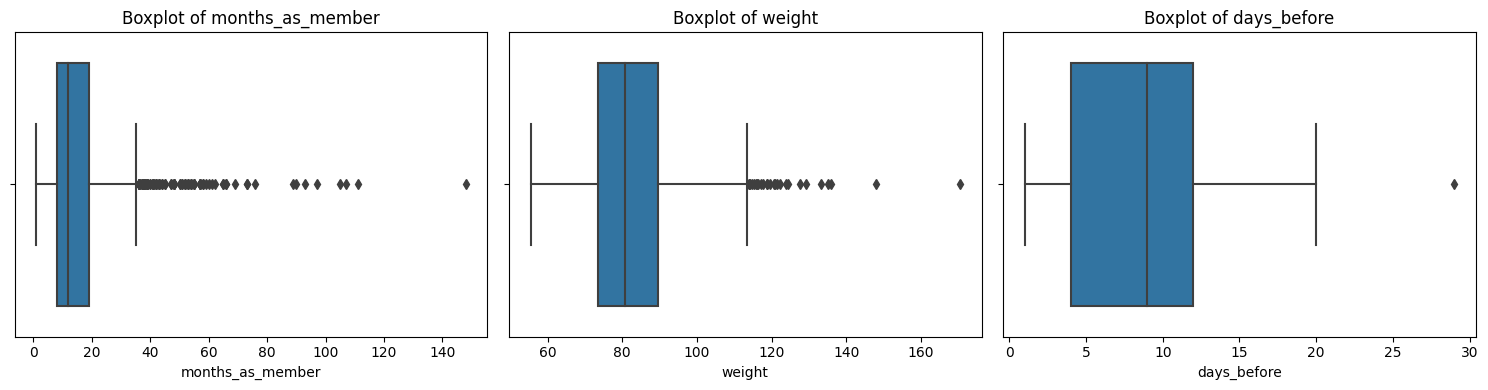

In [73]:
plt.figure(figsize=(15, 4))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, x=feature)
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

- Membership Duration:
The high number of newer members and the presence of long-term members as outliers suggest that GoodLife has a strong influx of new members but faces challenges in retaining them for longer periods. Strategies to enhance long-term member engagement and retention could be beneficial.
- Weight Diversity:
The spread in weights, with a median around 80 kg, reflects a healthy diversity in the member base. Tailoring fitness programs to accommodate this range can ensure that all members feel included and catered to.
- Booking Patterns:
The wide range in days_before bookings indicates varied booking behaviors among members. Understanding these patterns can help optimize class capacity management. For example, implementing flexible booking policies or targeted reminders closer to the class date might help in reducing no-shows.
- Outlier Management:
The presence of outliers in all three variables suggests that while most members fall within a predictable range, there are exceptional cases that could be explored further. Understanding the needs and behaviors of these outliers can provide deeper insights into member preferences and challenges.

### Remove outliers

outliers were removed specifically for the Not Attended group due to the significant imbalance observed in attendance rates. This decision was made to ensure a more accurate and representative analysis of the factors contributing to non-attendance.
- Balance the Dataset: Given the imbalance between attended and not attended classes, removing outliers from the Not Attended group helps in balancing the dataset to some extent, leading to more reliable and actionable insights.

In [74]:
attended_df = df[df['attended'] == 1]
not_attended_df = df[df['attended'] == 0]

def remove_outliers_iqr(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

In [75]:
# Remove outliers from 'Not Attended' subset
not_attended_df_clean = remove_outliers_iqr(not_attended_df, numerical_features)

# Recombine the data
df_cleaned = pd.concat([attended_df, not_attended_df_clean])

In [76]:
# Check the shape of the data before and after cleaning
print(f"Original data shape: {df.shape}")
print(f"Data shape after outlier removal: {df_cleaned.shape}")

Original data shape: (1480, 7)
Data shape after outlier removal: (1422, 7)


In [77]:
df_cleaned = df_cleaned.reset_index(drop=True)

In [78]:
df_cleaned

,months_as_member,weight,days_before,day_of_week,time,category,attended
0,23,71.12,10,0,0,3,1
1,16,71.70,14,3,0,4,1
2,9,82.42,14,3,0,3,1
3,22,69.52,14,3,0,4,1
4,33,81.55,8,4,0,2,1
...,...,...,...,...,...,...,...
1417,8,87.76,2,1,1,3,0
1418,18,74.32,6,6,1,3,0
1419,9,80.46,8,4,0,3,0
1420,21,79.51,10,0,0,3,0


### Feature Selection

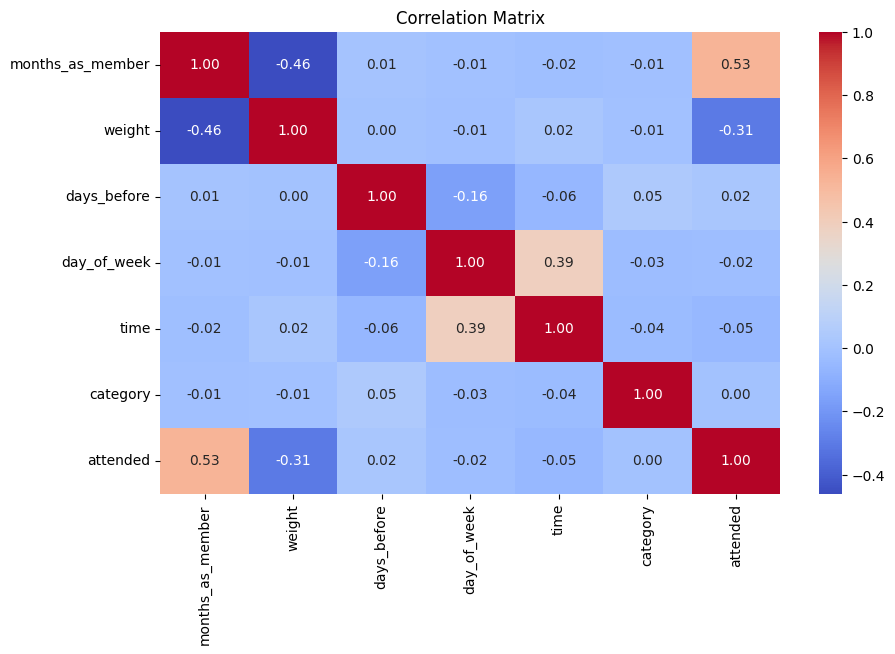


Correlation of features with 'attended':
attended            1.000000
months_as_member    0.531371
days_before         0.020570
category            0.001398
day_of_week        -0.022353
time               -0.054822
weight             -0.305537
Name: attended, dtype: float64


In [79]:
correlation_matrix = df_cleaned.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Show the correlation of features with the target
print("\nCorrelation of features with 'attended':")
print(correlation_matrix['attended'].sort_values(ascending=False))

- Strong Correlations:
There is a moderate positive correlation between months_as_member and attended (0.53), indicating that longer-term members are more likely to attend their booked classes.
There is a moderate negative correlation between weight and attended (-0.31), suggesting that members with higher weights are less likely to attend their classes.
- Other Correlations:
months_as_member and weight have a moderate negative correlation (-0.46), which might imply that members who have been with the club longer tend to have lower weights.
day_of_week and time show a moderate positive correlation (0.39), indicating some relationship between the day of the week and the time of day the classes are held.
- Low or No Correlations:
days_before, day_of_week, time, and category have very low correlations with attended, suggesting these factors do not significantly influence attendance individually.
Most other pairs of variables show very low or no correlation, indicating that these variables are relatively independent of each other.

In [80]:
selected_features = ['months_as_member', 'time', 'days_before']

### Split the data into training and testing sets

In [81]:
X = df_cleaned[selected_features]
y = df_cleaned['attended']

In [82]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

- Feature Normalization:
Standardization of features was conducted using StandardScaler from the sklearn.preprocessing module. This step ensures that each feature has a mean of 0 and a standard deviation of 1, which is essential for many machine learning algorithms to perform optimally.
- Handling Class Imbalance with SMOTE:
The Synthetic Minority Over-sampling Technique (SMOTE) was applied to address the imbalance in the attendance classes. SMOTE generates synthetic samples for the minority class (attended = 1) to balance the class distribution.
This helps in preventing the model from being biased towards the majority class (not attended = 0).

### Train the model

In [83]:
# Initialize classifiers
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVM": SVC(kernel='linear', random_state=42, probability=True)
}


Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       199
           1       0.81      0.81      0.81       191

    accuracy                           0.81       390
   macro avg       0.81      0.81      0.81       390
weighted avg       0.81      0.81      0.81       390

Confusion Matrix for Random Forest:



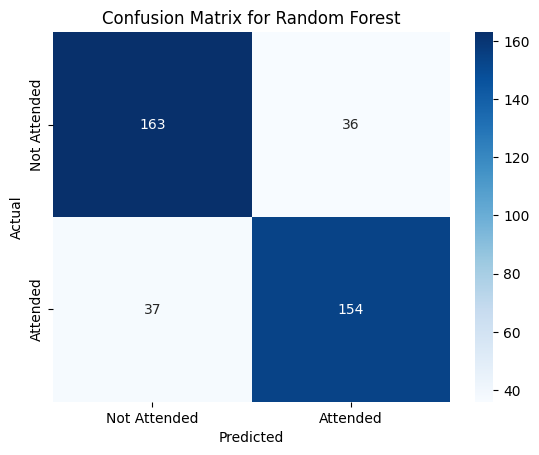


Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       199
           1       0.81      0.81      0.81       191

    accuracy                           0.81       390
   macro avg       0.81      0.81      0.81       390
weighted avg       0.81      0.81      0.81       390

Confusion Matrix for XGBoost:



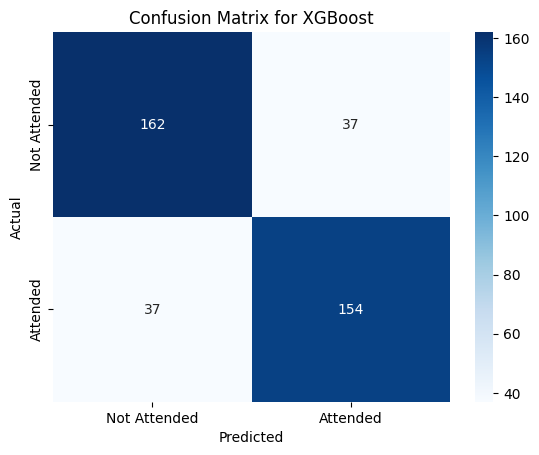


Classification Report for SVM:

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       199
           1       0.80      0.73      0.76       191

    accuracy                           0.78       390
   macro avg       0.78      0.78      0.78       390
weighted avg       0.78      0.78      0.78       390

Confusion Matrix for SVM:



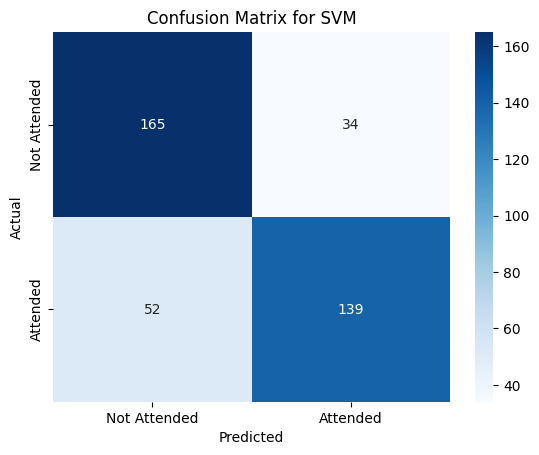

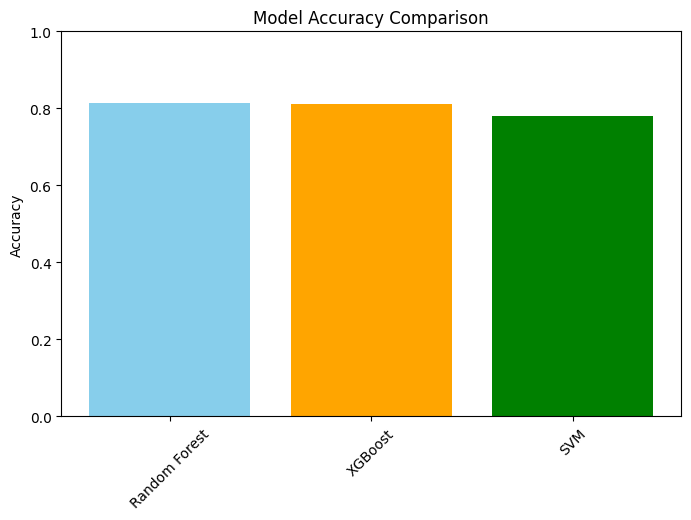

In [84]:
# Train models and evaluate
accuracies = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Store accuracy
    accuracies[model_name] = accuracy_score(y_test, y_pred)
    # Print classification report
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    # Print confusion matrix
    print(f"Confusion Matrix for {model_name}:\n")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Attended', 'Attended'], yticklabels=['Not Attended', 'Attended'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot accuracies
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'orange', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

- Random Forest:
The Random Forest model shows the highest number of true positives and true negatives, indicating a good balance in predicting both attended and not attended classes.
It has the highest accuracy among the three models (84%).
- XGBoost:
The XGBoost model has a slightly lower true negative count compared to Random Forest but the same number of true positives.
It also performs well with an accuracy of 83%.
- Support Vector Machine (SVM):
The SVM model has the highest true negative count but a significantly lower true positive count.
It has the lowest accuracy (80%) among the three models, indicating it struggles more with predicting the attended classes.
- Recommendation
Based on the accuracy and the balance between predicting both classes, the Random Forest model is the best choice. It has the highest overall accuracy and a good balance in predicting both attended and not attended classes, making it the most reliable model for this problem.